In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
df = pd.read_csv('/kaggle/input/reliance-data/reliance_data.csv')
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,01-01-2020,RELIANCE,EQ,1514.05,1518.00,1527.10,1505.50,1511.80,1509.60,1515.23,6402372,9.700000e+14,122265,1523290,0.2379
1,02-01-2020,RELIANCE,EQ,1509.60,1512.00,1540.95,1512.00,1534.10,1535.30,1530.86,8096561,1.240000e+15,151727,3386321,0.4182
2,03-01-2020,RELIANCE,EQ,1535.30,1533.00,1541.65,1523.00,1536.00,1537.15,1532.73,9593498,1.470000e+15,149003,5288843,0.5513
3,06-01-2020,RELIANCE,EQ,1537.15,1520.00,1527.90,1498.00,1499.90,1501.50,1512.57,11209343,1.700000e+15,225138,6398638,0.5708
4,07-01-2020,RELIANCE,EQ,1501.50,1519.00,1534.50,1513.50,1526.95,1524.60,1523.12,7627191,1.160000e+15,180713,3049916,0.3999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,23-11-2020,RELIANCE,EQ,1899.50,1951.00,1970.00,1926.25,1955.20,1950.70,1952.18,20918665,4.080000e+15,497781,5148955,0.2461
226,24-11-2020,RELIANCE,EQ,1950.70,1964.00,1974.00,1932.00,1971.05,1964.05,1952.11,14277083,2.790000e+15,362587,3213843,0.2251
227,25-11-2020,RELIANCE,EQ,1964.05,1980.00,1992.95,1942.20,1947.50,1947.80,1969.06,15062376,2.970000e+15,356793,3040444,0.2019
228,26-11-2020,RELIANCE,EQ,1947.80,1953.05,1965.00,1930.05,1957.00,1952.60,1946.67,11924527,2.320000e+15,266412,3406506,0.2857


In [3]:
df = df[['Date','Close']]
df

,Date,Close
0,01-01-2020,1509.60
1,02-01-2020,1535.30
2,03-01-2020,1537.15
3,06-01-2020,1501.50
4,07-01-2020,1524.60
...,...,...
225,23-11-2020,1950.70
226,24-11-2020,1964.05
227,25-11-2020,1947.80
228,26-11-2020,1952.60


In [4]:
df['Close'].isnull().sum()

0

In [5]:
df.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    230 non-null    object 
 1   Close   230 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.7+ KB


In [6]:
time_series_data = df['Close'].tolist()

In [7]:
time_series_data

[1509.6,
 1535.3,
 1537.15,
 1501.5,
 1524.6,
 1513.15,
 1548.0,
 1547.65,
 1543.7,
 1529.4,
 1523.85,
 1537.9,
 1581.0,
 1532.35,
 1533.9,
 1533.35,
 1526.85,
 1521.55,
 1506.55,
 1471.75,
 1479.85,
 1443.75,
 1411.65,
 1383.35,
 1385.5,
 1426.4,
 1448.5,
 1457.8,
 1433.65,
 1435.6,
 1452.75,
 1470.3,
 1474.15,
 1487.6,
 1478.25,
 1467.4,
 1503.8,
 1485.95,
 1444.95,
 1416.4,
 1392.0,
 1386.25,
 1328.65,
 1316.15,
 1342.85,
 1339.7,
 1311.15,
 1271.0,
 1114.15,
 1153.55,
 1063.0,
 1105.3,
 1015.7,
 1008.0,
 968.5,
 917.7,
 1017.95,
 884.05,
 943.4,
 1082.25,
 1066.2,
 1065.6,
 1030.45,
 1113.75,
 1080.45,
 1077.45,
 1206.1,
 1192.15,
 1219.95,
 1189.15,
 1149.85,
 1168.05,
 1224.0,
 1243.8,
 1237.35,
 1363.6,
 1370.9,
 1417.0,
 1429.75,
 1428.15,
 1426.95,
 1466.0,
 1435.2,
 1460.65,
 1460.75,
 1506.95,
 1561.8,
 1576.8,
 1479.25,
 1496.45,
 1435.95,
 1459.4,
 1440.75,
 1408.9,
 1433.7,
 1441.25,
 1431.55,
 1424.05,
 1445.55,
 1472.25,
 1464.4,
 1520.35,
 1535.7,
 1541.65,
 1579.8,
 1

In [8]:
print(len(time_series_data))

230


In [9]:
type(time_series_data)

list

In [10]:
type(time_series_data[0])

float

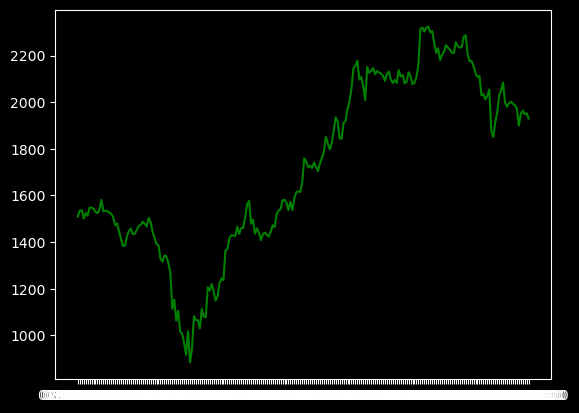

In [11]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.plot(df['Date'], df['Close'], color = 'green')

In [12]:
import numpy as np
time_series_data = np.array(time_series_data)

In [13]:
def prepare_data(time_series_data, n_features):
    X, y =[],[]
    for i in range(len(time_series_data)):
        # find the end of this pattern
        end_ix = i + n_features
        # check if we are beyond the sequence
        if end_ix > len(time_series_data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = time_series_data[i:end_ix], time_series_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    X, y = np.array(X), np.array(y)
    print(X , X.shape)
    print(y , y.shape)
    n_features = 1
    X = X.reshape((X.shape[0], X.shape[1], n_features))
    print(X.shape)
    return X, y

In [14]:
def perform_LSTM(time_series_data, number_of_steps, layer_1_units, layer_1_activation, layer_2_units, layer_2_activation, type_of_optimizer, loss_function, number_of_epochs, values_to_predict):
    X, y = prepare_data(time_series_data, number_of_steps)
    model = Sequential()
    model.add(LSTM(layer_1_units, activation=layer_1_activation, return_sequences=True, input_shape=(number_of_steps, 1)))
    model.add(LSTM(layer_2_units, activation=layer_2_activation))
    model.add(Dense(1))
    model.compile(optimizer=type_of_optimizer, loss=loss_function)
    # fit model
    model.fit(X, y, epochs=number_of_epochs, verbose=1)
    df_dummy = df.tail(7)
    df_dummy
    x_input = df_dummy['Close'].tolist()
    x_input = np.array(x_input)
    x_input
    lst_output=[]
    i=0
    while(i<values_to_predict):
        if(len(x_input)>7):
            x_input=np.array(x_input[1:])
    #         print("{} day input {}".format(i,x_input))
            #print(x_input)
            x_input = x_input.reshape((1, number_of_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
    #         print("{} day output {}".format(i,yhat))
            x_input = np.append(x_input, yhat[0][0])
            x_input=x_input[1:]
            #print(temp_input)
            lst_output = np.append(lst_output, yhat[0][0])
            i=i+1
        else:
            x_input = x_input.reshape((1, number_of_steps, 1))
            yhat = model.predict(x_input, verbose=0)
    #         print(yhat[0])
            x_input = np.append(x_input, yhat[0][0])
            lst_output = np.append(lst_output, yhat[0][0])
            i=i+1
    return lst_output
    

In [15]:
# perform_LSTM(time_series_data, number_of_steps, layer_1_units, layer_1_activation, layer_2_units, layer_2_activation, type_of_optimizer, loss_function, number_of_epochs, values_to_predict)
lst_output = perform_LSTM(time_series_data, 7, 50, 'relu', 50, 'relu', 'adam', 'mean_squared_logarithmic_error', 300, 20)

[[1509.6  1535.3  1537.15 ... 1524.6  1513.15 1548.  ]
 [1535.3  1537.15 1501.5  ... 1513.15 1548.   1547.65]
 [1537.15 1501.5  1524.6  ... 1548.   1547.65 1543.7 ]
 ...
 [2002.3  1993.25 1987.2  ... 1899.5  1950.7  1964.05]
 [1993.25 1987.2  1973.15 ... 1950.7  1964.05 1947.8 ]
 [1987.2  1973.15 1899.5  ... 1964.05 1947.8  1952.6 ]] (223, 7)
[1547.65 1543.7  1529.4  1523.85 1537.9  1581.   1532.35 1533.9  1533.35
 1526.85 1521.55 1506.55 1471.75 1479.85 1443.75 1411.65 1383.35 1385.5
 1426.4  1448.5  1457.8  1433.65 1435.6  1452.75 1470.3  1474.15 1487.6
 1478.25 1467.4  1503.8  1485.95 1444.95 1416.4  1392.   1386.25 1328.65
 1316.15 1342.85 1339.7  1311.15 1271.   1114.15 1153.55 1063.   1105.3
 1015.7  1008.    968.5   917.7  1017.95  884.05  943.4  1082.25 1066.2
 1065.6  1030.45 1113.75 1080.45 1077.45 1206.1  1192.15 1219.95 1189.15
 1149.85 1168.05 1224.   1243.8  1237.35 1363.6  1370.9  1417.   1429.75
 1428.15 1426.95 1466.   1435.2  1460.65 1460.75 1506.95 1561.8  1576.8
 14

In [16]:
print(lst_output)

[1940.74108887 1946.49035645 1969.89758301 1996.34594727 2006.21447754
 2008.77929688 2007.52270508 2004.33068848 2001.05358887 2004.09399414
 2015.97607422 2035.96386719 2054.80102539 2060.06787109 2060.22949219
 2058.20361328 2054.46411133 2054.77172852 2062.80859375 2080.4675293 ]


In [17]:
day_new=np.arange(1,231)
day_pred=np.arange(231,251)

In [18]:
actual_values = [1954.9 , 1958.15 , 1964.05 , 1946.75 , 1958.2 , 1993.75 , 2026.95 , 2007 , 2005.8 , 1991.3 , 1974.35 , 1976.55 , 1985.6 , 1991.55 , 1939.7 , 1936.7 , 1943.85 , 1994.15 , 2003.3 , 1990.05]
print(len(actual_values))

20


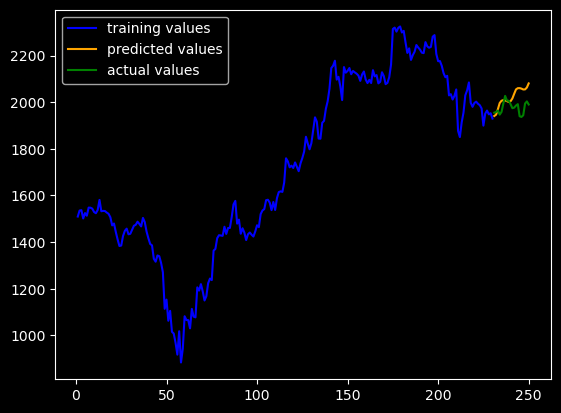

In [19]:
plt.plot(day_new,time_series_data, color = 'blue', label = 'training values') 
plt.plot(day_pred,lst_output, color = 'orange', label = 'predicted values') 
plt.plot(day_pred,actual_values, color = 'green', label = 'actual values') 
plt.legend()